(5625, 19)
(5625,)
(1407, 19)
(1407,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int64  
 16  Paym

c:\users\kevin nugraha\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\kevin nugraha\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


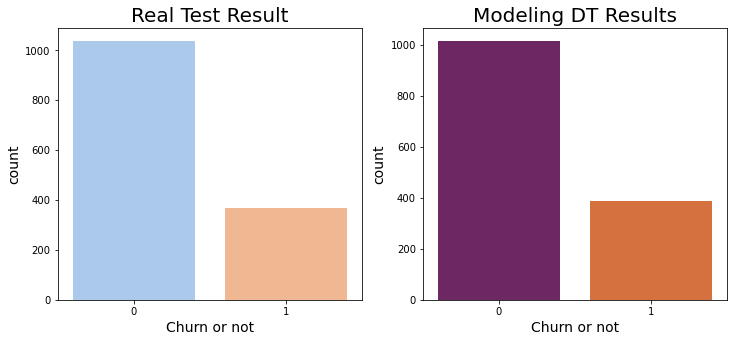

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# PREPARE THE DATASETS:
# Source Dataset : Kaggle.com - https://www.kaggle.com/blastchar/telco-customer-churn
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

del df['customerID']

# LABEL ENCODE THE CATEGORICAL DATA:
labelencoder = LabelEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])
df['MultipleLines'] = labelencoder.fit_transform(df['MultipleLines'])
df['InternetService'] = labelencoder.fit_transform(df['InternetService'])
df['Contract'] = labelencoder.fit_transform(df['Contract'])
df['PaymentMethod'] = labelencoder.fit_transform(df['PaymentMethod'])
df['OnlineSecurity'] = labelencoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])

df = df.drop(df[df.TotalCharges == " "].index)

df = df.replace(['Yes'],1)
df = df.replace(['No'],0)

# MAKING TRAINING DATA AND MACINE LEARNING ALGORITHMS :

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

df.info()
m = DecisionTreeClassifier()
m = m.fit(X_train, y_train)
y_pred = m.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)

# DISTRIBUTION OF REAL TEST DATA RESULTS:

plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(y_test, palette = 'pastel')
plt.title('Real Test Result', fontsize = 20)
plt.xlabel('Churn or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

# PREDICTION TEST BY MACHINE LEARNING RESULTS:
plt.subplot(1, 2, 2)
sns.countplot(y_pred, palette = 'inferno')
plt.title('Modeling DT Results', fontsize = 20)
plt.xlabel('Churn or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()


(7043, 20)
(1869, 20)


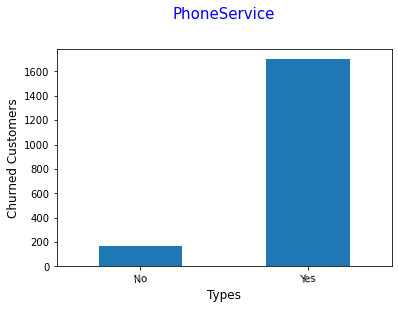

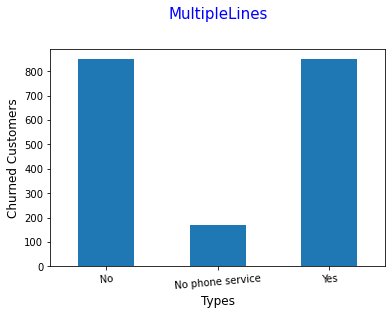

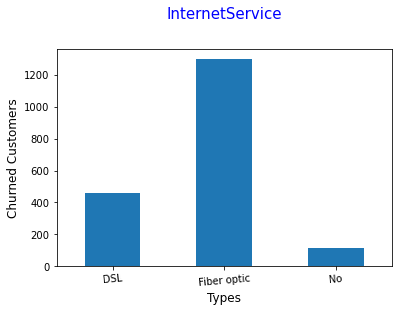

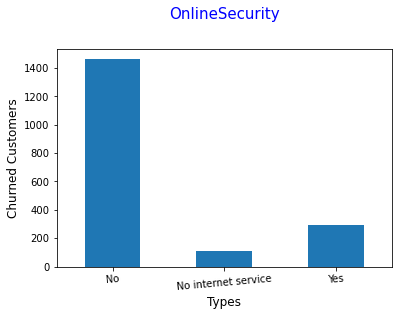

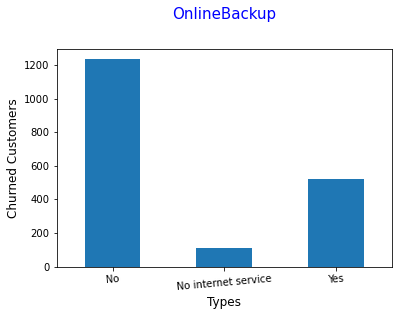

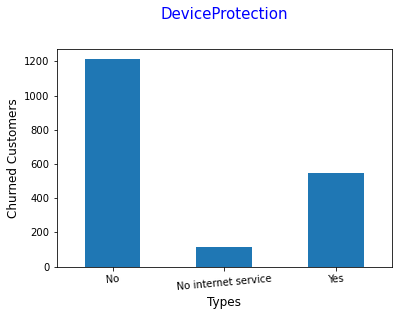

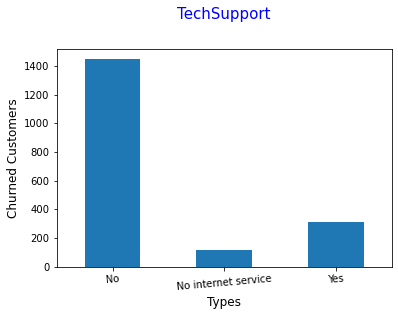

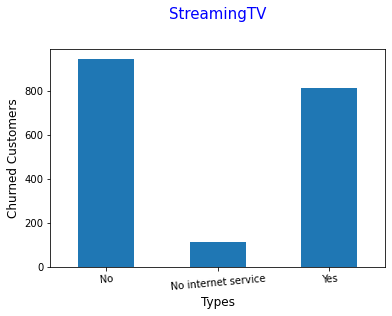

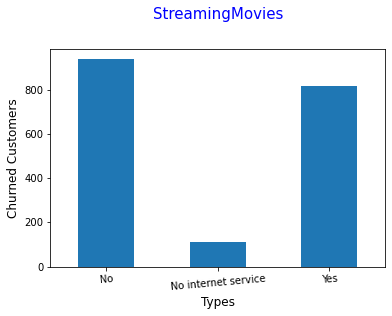

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# PREPARE THE DATASETS:
# Source Dataset : Kaggle.com - https://www.kaggle.com/blastchar/telco-customer-churn
df2 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

del df2['customerID']
print(df2.shape)
df2 = df2.loc[df2['Churn']=='Yes']
print(df2.shape)
# DETERMINE THE MOST IMPORTANT PREDICTORS FOR GIVEN CHURN CUSTOMER:
# PLOTTING ALL DATA IN GRAPHS
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
predictorsets = []
for i in services:
    df3 = df2.groupby(i)['Churn'].count().plot(kind='bar')
    predictorsets.append(df3)
    plt.title(i, loc='center', pad=30, fontsize=15, color='blue')
    plt.xlabel('Types', fontsize = 12)
    plt.xticks(rotation = 5)
    plt.ylabel('Churned Customers', fontsize = 12)
    plt.show()
    print("==============================================================")

